# Going From Staregies A&B To A Portfolio

So far, I have implemented two startegies using momentum and news analytics on Quantopian along with their backtests. The universe of assets is considered to be Q1500US - the 1500 most liquid equities in the US stock exchange. In this notebook I will attempt to take the best performing equities from those startegies for my portfolio and size them appropriately

## Background Work

In [2]:
import yfinance as yf
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta
from matplotlib import pyplot as plt

pd.options.display.max_rows = 5

### Defining All Equities

In [3]:
equities_strategyA = [
    'ARNC',
    'ABT',
    'ADSK',
    'ADBE',
    'ADI',
    'AEP',
    'AES',
    'AFL',
    'AMD',
    'ADP'
]

equities_strategyB = [
    'ENDP',
    'MDCO',
    'WW',
    'STMP',
    'INFN',
    'SEMG',
    'MIK',
    'RETA',
    'CLDR',
    'HOME',
]

### Querying Data From Yahoo Finance

[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  10 of 10 completed

Fields: Index(['ABT', 'ADBE', 'ADI', 'ADP', 'ADSK', 'AEP', 'AES', 'AFL', 'AMD',
       'ARNC'],
      dtype='object')


,ABT,ADBE,ADI,ADP,ADSK,AEP,AES,AFL,AMD,ARNC
Date,,,,,,,,,,
2018-11-26,68.809998,231.960007,90.070000,144.649994,138.800003,75.959999,15.400000,44.610001,20.080000,20.459999
2018-11-27,69.709999,232.250000,89.580002,145.320007,140.160004,76.580002,15.220000,44.549999,21.049999,20.379999
...,...,...,...,...,...,...,...,...,...,...
2019-11-22,83.739998,299.299988,110.650002,169.649994,167.009995,91.540001,18.830000,53.990002,39.150002,30.549999
2019-11-25,84.489998,305.279999,112.930000,170.199997,168.880005,90.889999,18.780001,54.299999,39.790001,30.959999


,CLDR,ENDP,HOME,INFN,MDCO,MIK,RETA,SEMG,STMP,WW
Date,,,,,,,,,,
2018-11-26,11.88,11.66,27.629999,4.49,21.430000,16.84,63.250000,16.120001,161.639999,49.110001
2018-11-27,11.66,11.51,26.700001,4.40,20.910000,16.59,60.570000,15.840000,157.300003,49.000000
...,...,...,...,...,...,...,...,...,...,...
2019-11-22,9.44,4.76,8.240000,6.41,68.550003,7.84,209.949997,15.460000,90.290001,42.369999
2019-11-25,9.60,4.89,8.420000,6.52,83.800003,8.38,209.199997,15.660000,87.919998,42.689999


Text(0.5, 1.0, 'StrategyB')

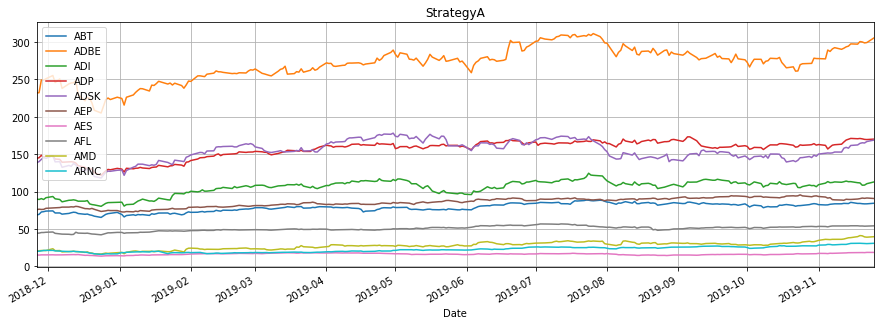

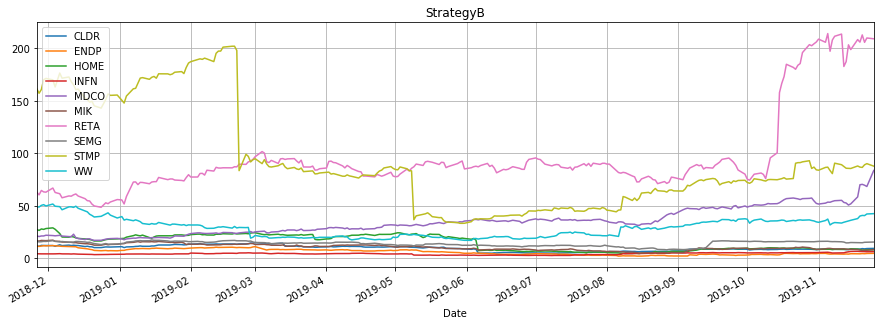

In [4]:
end = datetime.now().strftime("%Y-%m-%d")
start = datetime.now() - relativedelta(years=1)


data_strategyA = yf.download(equities_strategyA,
                             start,
                             end)['Close']
data_strategyB = yf.download(equities_strategyB,
                             start,
                             end)['Close']

print("\nFields:", data_strategyA.columns.get_level_values(0).unique())

display(data_strategyA)
display(data_strategyB)

data_strategyA.plot(figsize=(15,5)); plt.grid(); plt.title('StrategyA')
data_strategyB.plot(figsize=(15,5)); plt.grid(); plt.title('StrategyB')

### Volatility Calculation

,ABT,ADBE,ADI,ADP,ADSK,AEP,AES,AFL,AMD,ARNC
Date,,,,,,,,,,
2018-12-27,2.152323,14.482352,3.304833,7.953440,8.161533,1.863621,0.594920,1.073096,1.733152,1.654901
2018-12-28,2.113731,14.690265,3.288898,7.974982,8.214278,1.929479,0.624701,1.081505,1.778756,1.733790
...,...,...,...,...,...,...,...,...,...,...
2019-11-22,0.996717,10.723192,2.612912,4.279090,7.200276,2.106633,0.645017,0.485207,2.739780,1.275174
2019-11-25,0.900779,10.639629,2.368865,4.362664,7.487051,1.893940,0.647499,0.418439,2.610929,1.258922


,CLDR,ENDP,HOME,INFN,MDCO,MIK,RETA,SEMG,STMP,WW
Date,,,,,,,,,,
2018-12-27,0.756926,1.765489,4.493494,0.281593,1.775476,1.571268,5.076146,0.938340,9.685090,3.856162
2018-12-28,0.783262,1.842899,4.363297,0.276709,1.767241,1.566712,5.057071,1.015140,9.743095,3.993477
...,...,...,...,...,...,...,...,...,...,...
2019-11-22,0.251343,0.219949,0.570715,0.548129,6.393531,0.824679,8.808455,0.510152,2.962186,2.668464
2019-11-25,0.300417,0.236414,0.517405,0.556593,8.534888,0.771686,7.939270,0.506209,2.834873,2.979943


Text(0.5, 1.0, 'StrategyB')

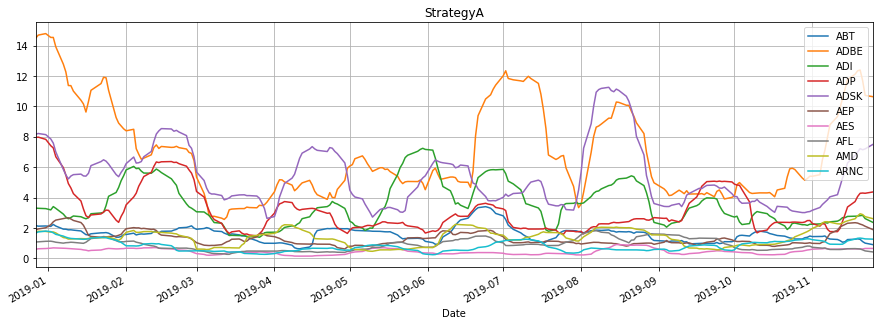

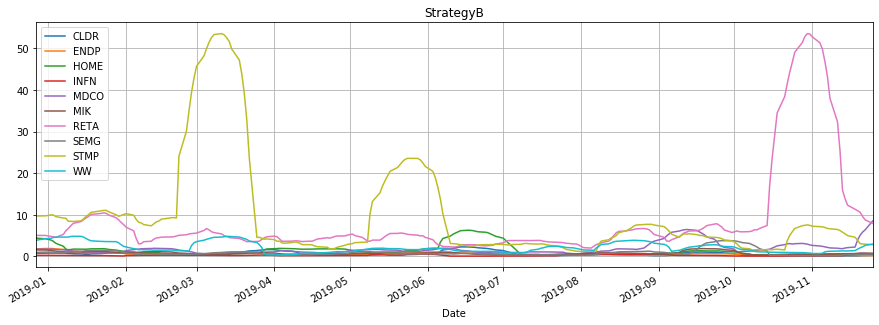

In [5]:
volatilityA = data_strategyA.rolling(22).std().dropna(how='all')
volatilityB = data_strategyB.rolling(22).std().dropna(how='all')

display(volatilityA)
display(volatilityB)

volatilityA.plot(figsize=(15,5)); plt.grid(); plt.title('StrategyA')
volatilityB.plot(figsize=(15,5)); plt.grid(); plt.title('StrategyB')

### Getting Asset Correlation (from Close Price)

In [6]:
corrA = data_strategyA.corr()
corrB = data_strategyB.corr()

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(corrA)
    display(corrB)

,ABT,ADBE,ADI,ADP,ADSK,AEP,AES,AFL,AMD,ARNC
ABT,1.000000,0.905433,0.846243,0.887144,0.448923,0.877868,0.323005,0.850604,0.870459,0.781433
ADBE,0.905433,1.000000,0.856263,0.911091,0.691462,0.795653,0.410979,0.878651,0.880127,0.736241
ADI,0.846243,0.856263,1.000000,0.849914,0.688135,0.741442,0.546324,0.758348,0.767778,0.583012
ADP,0.887144,0.911091,0.849914,1.000000,0.657381,0.853679,0.428775,0.824763,0.878229,0.710360
ADSK,0.448923,0.691462,0.688135,0.657381,1.000000,0.342441,0.661161,0.605111,0.505193,0.194256
AEP,0.877868,0.795653,0.741442,0.853679,0.342441,1.000000,0.212351,0.829323,0.856676,0.853300
AES,0.323005,0.410979,0.546324,0.428775,0.661161,0.212351,1.000000,0.415187,0.410687,0.108225
AFL,0.850604,0.878651,0.758348,0.824763,0.605111,0.829323,0.415187,1.000000,0.862542,0.742144
AMD,0.870459,0.880127,0.767778,0.878229,0.505193,0.856676,0.410687,0.862542,1.000000,0.886537
ARNC,0.781433,0.736241,0.583012,0.710360,0.194256,0.853300,0.108225,0.742144,0.886537,1.000000


,CLDR,ENDP,HOME,INFN,MDCO,MIK,RETA,SEMG,STMP,WW
CLDR,1.000000,0.873574,0.886358,0.301168,-0.512279,0.834143,-0.153775,0.633531,0.721639,0.199747
ENDP,0.873574,1.000000,0.918155,-0.026863,-0.711803,0.930058,-0.302953,0.589211,0.762443,0.180758
HOME,0.886358,0.918155,1.000000,-0.049873,-0.672989,0.862534,-0.332965,0.514335,0.584053,-0.006127
INFN,0.301168,-0.026863,-0.049873,1.000000,0.482360,0.007002,0.517891,0.350210,0.240115,0.462718
MDCO,-0.512279,-0.711803,-0.672989,0.482360,1.000000,-0.647020,0.751352,-0.090143,-0.504962,0.121032
MIK,0.834143,0.930058,0.862534,0.007002,-0.647020,1.000000,-0.286117,0.694142,0.781804,0.306158
RETA,-0.153775,-0.302953,-0.332965,0.517891,0.751352,-0.286117,1.000000,0.227090,-0.193402,0.122791
SEMG,0.633531,0.589211,0.514335,0.350210,-0.090143,0.694142,0.227090,1.000000,0.594468,0.395841
STMP,0.721639,0.762443,0.584053,0.240115,-0.504962,0.781804,-0.193402,0.594468,1.000000,0.579995
WW,0.199747,0.180758,-0.006127,0.462718,0.121032,0.306158,0.122791,0.395841,0.579995,1.000000


## Using Calculations Above For Position Sizing

### Startegy A

In [7]:
volatilityMeanAdjusted = volatilityA.mean()/data_strategyA.mean()
volatilityMeanAdjusted = (volatilityMeanAdjusted)/volatilityMeanAdjusted.sum()


corrAdjusted = corrA.sum(axis=1) - 1
corrAdjusted = (corrAdjusted-corrAdjusted.min())/corrAdjusted.sum()

position_weightsA = 1/(volatilityMeanAdjusted+corrAdjusted)
position_weightsA = position_weightsA/position_weightsA.sum()

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(position_weightsA*100)

ABT     10.661195
ADBE     9.008066
ADI      7.911590
ADP     10.478820
ADSK     9.240379
AEP     13.319680
AES     13.756946
AFL     11.510018
AMD      5.661769
ARNC     8.451537
dtype: float64


### Streategy B

In [8]:
volatilityMeanAdjusted = volatilityB.mean()/data_strategyB.mean()
volatilityMeanAdjusted = (volatilityMeanAdjusted)/volatilityMeanAdjusted.sum()


corrAdjusted = corrB.sum(axis=1) - 1
corrAdjusted = (corrAdjusted-corrAdjusted.min())/corrAdjusted.sum()

position_weightsB = 1/(volatilityMeanAdjusted+corrAdjusted)
position_weightsB = position_weightsB/position_weightsB.sum()

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(position_weightsB*100)

CLDR     6.819343
ENDP     6.550764
HOME     7.041174
INFN     8.749659
MDCO    32.202290
MIK      6.921628
RETA    10.712855
SEMG     6.845635
STMP     6.047329
WW       8.109321
dtype: float64

## Allocating Risk Based On Weights Calulated

So far we have weights (that sum up to 1) for each strategy. How do we decide how much capital to put into each strategy? Here I will allocate 1/2 of the risk into each strategy and size the entire portfolio accordingly. I will be working with the assumption that the max drawdown for both the strategies combined is 10M. Based on a 50% risk allocation, this will mean I need to size each strategy's positions such the drawdown for the strategy does not exceed 5M.

### Strategy A

In [9]:
df_A = pd.concat([data_strategyA.iloc[-1, :], position_weightsA, volatilityA.mean()],
          axis=1)
df_A.columns = ['Price Today', 'Weight', 'Avg Volatility']
df_A['-2std'] = -2 * df_A['Avg Volatility']
df_A['Risk'] = 5e5 * df_A['Weight']
df_A['Shares'] = -(df_A['Risk']/df_A['-2std']).round()
df_A['Value Today'] = df_A['Shares'] * df_A['Price Today']

print('Total Dollars Invested Today: ', df_A['Value Today'].sum())


with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_A)

Total Dollars Invested Today:  11984804.50458908


,Price Today,Weight,Avg Volatility,-2std,Risk,Shares,Value Today
ABT,84.489998,0.106612,1.591217,-3.182434,53305.973672,16750.0,1.415207e+06
ADBE,305.279999,0.090081,6.864875,-13.729750,45040.330651,3280.0,1.001318e+06
ADI,112.930000,0.079116,3.491309,-6.982619,39557.950987,5665.0,6.397485e+05
ADP,170.199997,0.104788,3.099217,-6.198435,52394.102266,8453.0,1.438701e+06
ADSK,168.880005,0.092404,5.328419,-10.656838,46201.893855,4335.0,7.320948e+05
AEP,90.889999,0.133197,1.295357,-2.590713,66598.400762,25707.0,2.336509e+06
AES,18.780001,0.137569,0.447618,-0.895236,68784.732037,76834.0,1.442943e+06
AFL,54.299999,0.115100,0.893477,-1.786954,57550.089034,32206.0,1.748786e+06
AMD,39.790001,0.056618,1.400964,-2.801928,28308.843101,10103.0,4.019984e+05
ARNC,30.959999,0.084515,0.790514,-1.581027,42257.683636,26728.0,8.274989e+05


### Strategy B

In [10]:
df_B = pd.concat([data_strategyB.iloc[-1, :], position_weightsB, volatilityB.mean()],
          axis=1)
df_B.columns = ['Price Today', 'Weight', 'Avg Volatility']
df_B['-2std'] = -2 * df_B['Avg Volatility']
df_B['Risk'] = 5e5 * df_B['Weight']
df_B['Shares'] = -(df_B['Risk']/df_B['-2std']).round()
df_B['Value Today'] = df_B['Shares'] * df_B['Price Today']

print('Total Dollars Invested Today: ', df_B['Value Today'].sum())


with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_B)

Total Dollars Invested Today:  6350058.543444157


,Price Today,Weight,Avg Volatility,-2std,Risk,Shares,Value Today
CLDR,9.600000,0.068193,0.655766,-1.311531,34096.716727,25998.0,2.495808e+05
ENDP,4.890000,0.065508,0.609625,-1.219250,32753.820227,26864.0,1.313650e+05
HOME,8.420000,0.070412,1.431666,-2.863333,35205.868992,12295.0,1.035239e+05
INFN,6.520000,0.087497,0.275190,-0.550380,43748.296201,79487.0,5.182552e+05
MDCO,83.800003,0.322023,1.840426,-3.680851,161011.450650,43743.0,3.665664e+06
MIK,8.380000,0.069216,0.793617,-1.587234,34608.141648,21804.0,1.827175e+05
RETA,209.199997,0.107129,8.516673,-17.033346,53564.276745,3145.0,6.579340e+05
SEMG,15.660000,0.068456,0.882051,-1.764103,34228.177098,19403.0,3.038510e+05
STMP,87.919998,0.060473,9.776620,-19.553240,30236.646014,1546.0,1.359243e+05
WW,42.689999,0.081093,2.156908,-4.313816,40546.605699,9399.0,4.012433e+05


## Portfolio (Optimized) 

In [11]:
portfolio = pd.concat([df_A[['Price Today', 'Shares', 'Value Today']], 
         df_B[['Price Today', 'Shares', 'Value Today']]],
         axis=0)
portfolio.columns = ['Price Today', 'Optimal Shares', 'Value Today']

with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(portfolio)

,Price Today,Optimal Shares,Buying Value
ABT,84.489998,16750.0,1.415207e+06
ADBE,305.279999,3280.0,1.001318e+06
ADI,112.930000,5665.0,6.397485e+05
ADP,170.199997,8453.0,1.438701e+06
ADSK,168.880005,4335.0,7.320948e+05
AEP,90.889999,25707.0,2.336509e+06
AES,18.780001,76834.0,1.442943e+06
AFL,54.299999,32206.0,1.748786e+06
AMD,39.790001,10103.0,4.019984e+05
ARNC,30.959999,26728.0,8.274989e+05


In [13]:
portfolio['Buying Value'].sum()/1e6

17.66379613889122

## What About the Current Holdings?

At this point we have determined optimal position sizes based on the risk allocation from weights above. However, at the time, I have already submitted multiple trades. In this section I will investigate wheather the worst case, for the current risk allocation, takes me less than 1M.

In [35]:
current_B = pd.DataFrame([95480,
8700,
12880,
5400,
79540,
27880,
52900,
2180,
52840,
51780],
                        index = equities_strategyB,
                        columns = ['Shares Holding'])

current_A = pd.DataFrame([15860,
6160,
2520,
2720,
3620,
3620,
21800,
6760,
14840,
2600], 
                        index = equities_strategyA,
                        columns = ['Shares Holding'])

current_A['Risk'] = df_A['-2std']*current_A['Shares Holding']
current_B['Risk'] = df_B['-2std']*current_B['Shares Holding']

In [39]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(current_A)
    display(current_B)
    
print('Worst Case Drawdown:', current_A['Risk'].sum() + current_B['Risk'].sum())

,Shares Holding,Risk
ARNC,15860,-25075.095902
ABT,6160,-19603.792071
ADSK,2520,-26855.232742
ADBE,2720,-37344.920121
ADI,3620,-25277.078973
AEP,3620,-9378.381817
AES,21800,-19516.135441
AFL,6760,-12079.806074
AMD,14840,-41580.606407
ADP,2600,-16115.930717


,Shares Holding,Risk
ENDP,95480,-116413.973928
MDCO,8700,-32023.407179
WW,12880,-55561.944492
STMP,5400,-105587.495502
INFN,79540,-43777.241639
SEMG,27880,-49183.187665
MIK,52900,-83964.690542
RETA,2180,-37132.693491
CLDR,52840,-69301.319983
HOME,51780,-148263.366693


Worst Case Drawdown: -974036.3013832084


I'm barely meeting the criteria - I have my current (suboptimally weighted) portfolio structure such that the worst case drawdown is less than -1M. So for now I will keep my positions.